1. Preprocessing 

1.1 Importing

In [625]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

1.2 Reading data

In [604]:
url = "https://drive.google.com/file/d/1a4DUEaAP5YRAE3CJ1oJz3Sg21BcrMBEq/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)
data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


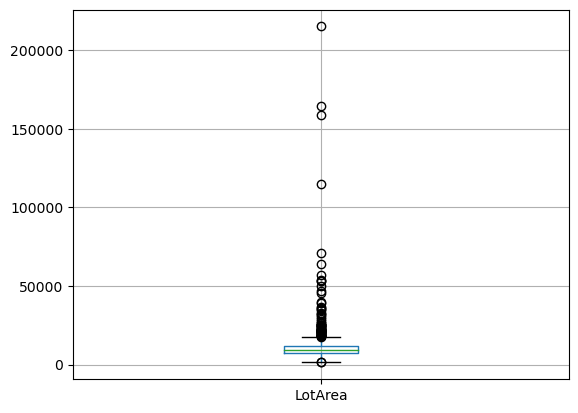

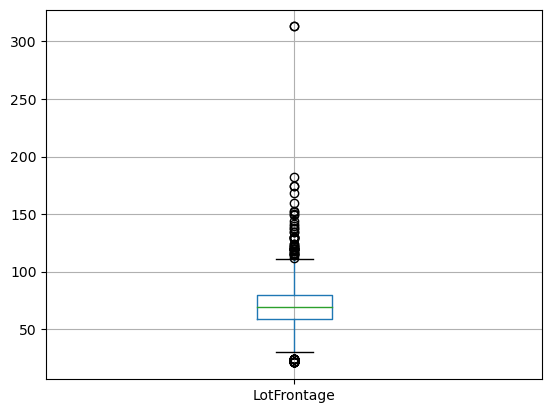

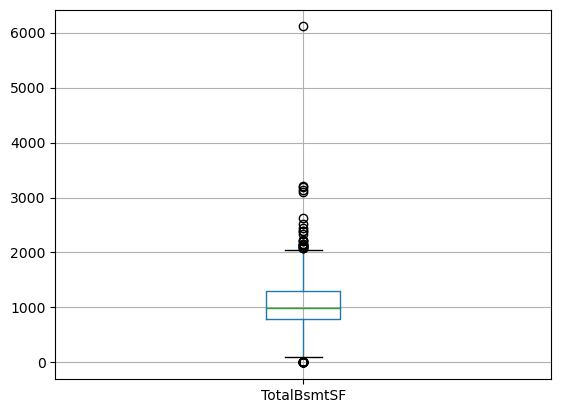

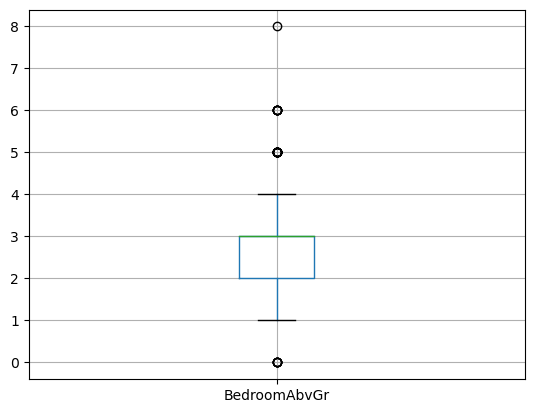

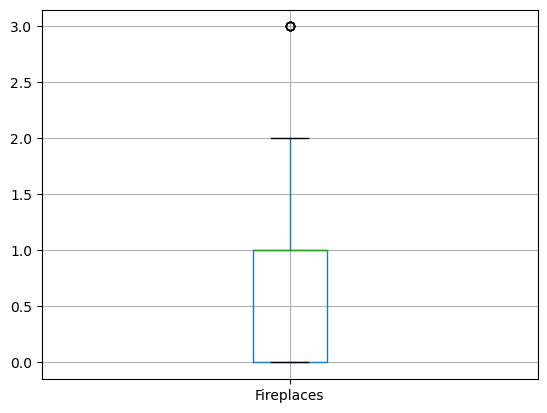

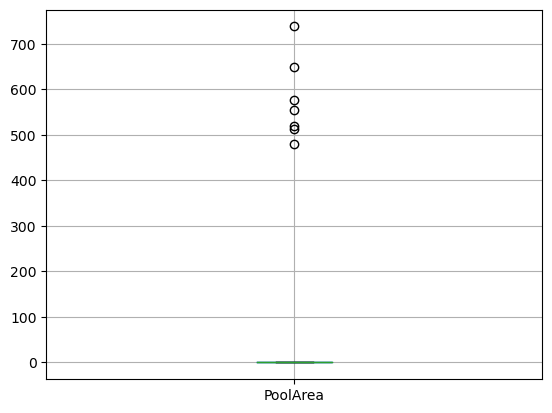

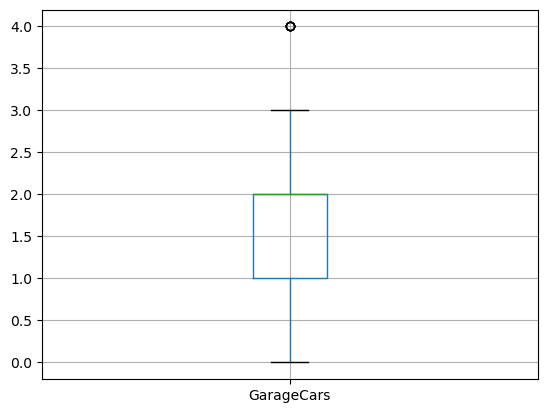

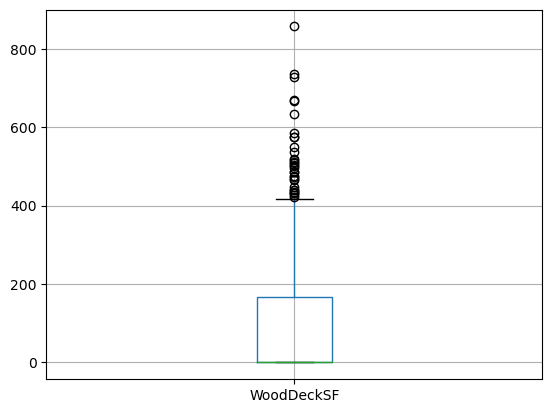

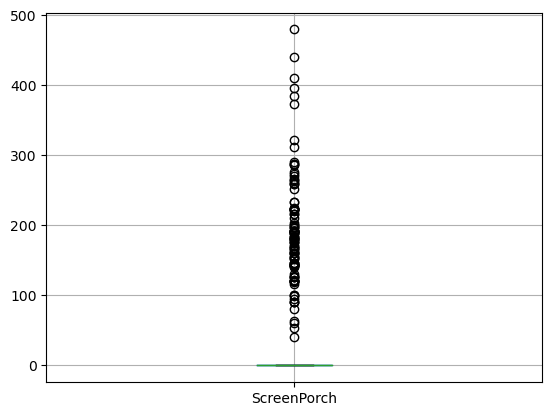

KeyError: "None of [Index(['MSZoning'], dtype='object')] are in the [columns]"

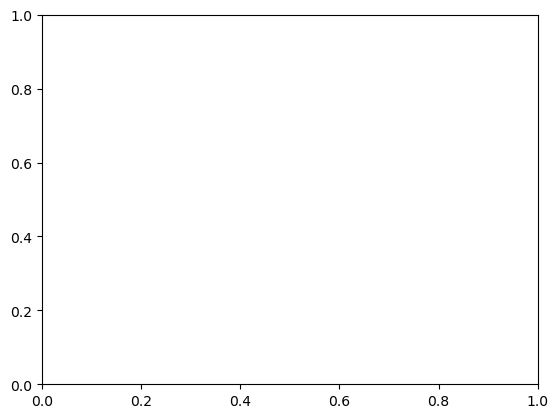

In [518]:
Outliars
#import matplotlib as plt
#import matplotlib.pyplot as plt

#for value in data:
#        data.boxplot(column=value, return_type="axes")
#        plt.show();

In [511]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning',
       'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtFinT

In [ ]:
data.sample(15)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1119,7560,70.0,1040,3,0,0,1,140,0,RL,...,Attchd,RFn,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
843,8000,80.0,1800,6,0,0,0,0,0,RL,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
667,8125,65.0,1408,3,1,0,2,224,0,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1278,9473,75.0,1128,3,1,0,2,0,0,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
845,16647,NaN,1390,3,2,0,2,0,0,RL,...,Basment,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1405,3842,44.0,1594,2,1,0,2,128,155,RM,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
133,6853,NaN,1267,2,0,0,2,192,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1060,4920,41.0,1338,2,0,0,2,0,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1291,1680,21.0,630,3,0,0,1,185,0,RM,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1043,11839,86.0,1475,4,1,0,2,192,0,RL,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [297]:
data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [298]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [299]:
data.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [300]:
data.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [ ]:
data

1.3 X ynd y labels creating 

In [605]:
X = data                 #drop if need a few columns are't usefull
y = X.pop("Expensive")

1.4 Spliting the data

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

1.5 Creating 2 pipelines are performing in pararel and add it in preprocessor

In [190]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

2. Modeling -  Decision Tree

In [191]:
from sklearn.model_selection import GridSearchCV
big_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}
  
search_dt = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dt.fit(X_train, y_train)  

scores = {"dtree" : search_dt.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.9272403800300795}

3. Error Analysis

3.1 Test acuracy

In [196]:
accuracy_score(search_dt.predict(X_test), y_test)
#without any fit to this data

0.934931506849315

3.2 Plot it using ConfusionMatrix

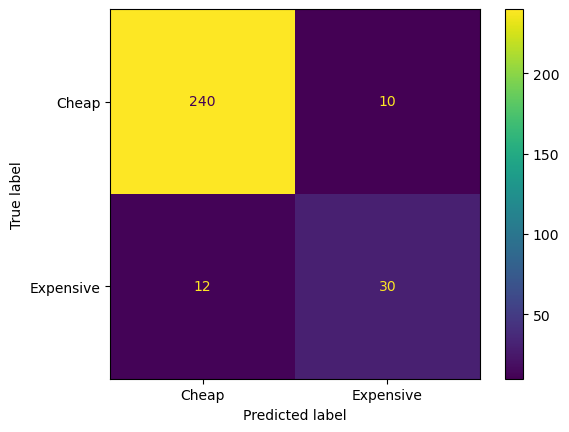

In [114]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_dt,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [384]:
DecisionTreeClassifier = dt_df      #pd.DataFrame(search_dt.predict(xx_test))
DecisionTreeClassifier.to_csv('DecisionTreeClassifier.csv', index=False)

In [383]:
dt_df = pd.DataFrame(search_lr.predict(xx_test))
dt_df.rename(columns = {0:'Expensive'}, inplace=True)
dt_df

,Expensive
0,0
1,0
2,0
3,0
4,0
...,...
1454,0
1455,0
1456,0
1457,0


In [249]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_dt.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.8165680473372781

In [256]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_dt.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.759493670886076

In [ ]:
++ METRICS F1 SCORE

In [145]:
from sklearn import metrics
y_pred = y_train
y_true = search.predict(X_train)
metrics.precision_score(y_true, y_pred)
metrics.recall_score(y_true, y_pred)
metrics.f1_score(y_true, y_pred)
metrics.fbeta_score(y_true, y_pred, beta=0.5)
metrics.fbeta_score(y_true, y_pred, beta=1)
metrics.fbeta_score(y_true, y_pred, beta=2)
metrics.precision_recall_fscore_support(y_true, y_pred)#, beta=0.5)

(array([1.        , 0.94285714]),
 array([0.99002991, 1.        ]),
 array([0.99498998, 0.97058824]),
 array([1003,  165]))

In [142]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)


0.9705882352941176

In [143]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search.predict(X_test)
f1_score(y_true, y_pred)# average=None)

0.8717948717948718

In [140]:
y_pred

318     1
580     0
961     1
78      0
5       0
       ..
1041    0
1122    0
1346    1
1406    0
1389    0
Name: Expensive, Length: 1168, dtype: int64

1.Preprocessing data 

For KNeighborsClassifier we must to scale our data
So we making the another one 'preprocessing'

In [197]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [468]:
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler())])

2. Modeling - KNeighborsClassifier

In [462]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


big_pipeline = make_pipeline(preprocessor,
                              KNeighborsClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
    "kneighborsclassifier__n_neighbors": range(3, 10, 2)#not be the pairs numbers (2,4,6,8)
    #"kneighborsclassifier__p":[1.3],  #not really usefull
    #"kneighborsclassifier__weights":['distance', 'uniform']    #not really usefull
}

search_knn = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn.fit(X_train, y_train)

scores = {"KNN" : search_knn.best_score_}
scores

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'KNN': 0.9306445104728367}

In [460]:
search_knn.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 1.3,
 'kneighborsclassifier__weights': 'distance'}

3. Error Analysis
3.1 Test data accuracy 

In [463]:
accuracy_score(search_knn.predict(X_test), y_test)
#without any fit to this data

0.934931506849315

3.2 Plot it 

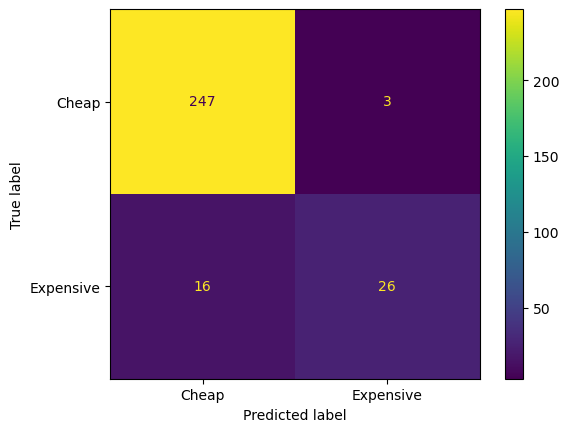

In [464]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_knn,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [385]:
KNeighborsClassifier = knn_df       #pd.DataFrame(search_knn.predict(xx_test))
KNeighborsClassifier.to_csv('KNeighborsClassifier.csv', index=False)

In [382]:
knn_df = pd.DataFrame(search_knn.predict(xx_test))
knn_df.rename(columns = {0:'Expensive'}, inplace=True)
knn_df

,Expensive
0,0
1,0
2,0
3,0
4,0
...,...
1454,0
1455,0
1456,0
1457,0


In [250]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_knn.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.7766990291262136

In [255]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_knn.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.732394366197183

In [125]:
pd.DataFrame(search_knn.predict(xx_test)

array([0, 0, 0, ..., 0, 0, 0])

sklearn.linear_model.LogisticRegression

In [259]:
from sklearn.linear_model import LogisticRegression

In [372]:
#ORIGINAL 
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [375]:
#ORIGINAL 
from sklearn.model_selection import GridSearchCV


big_pipeline = make_pipeline(preprocessor,
                              LogisticRegression())

param_grid = {
     "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
     "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
     "logisticregression__random_state":[0],
     "logisticregression__solver":["liblinear", "saga", "lbfgs"], #'lbfgs' doesn't work wirh StandardScaler
     "logisticregression__penalty":["l2"], #'l1' doesn't work with 'lbfgs' 
     "logisticregression__tol":[0.01]
}

search_lr = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_lr.fit(X_train, y_train)

scores = {"LogisticRegression" : search_lr.best_score_}
scores

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'LogisticRegression': 0.9460621400535564}

In [376]:
search_lr.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 0,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.01}

Test accuracy

In [377]:
accuracy_score(search_lr.predict(X_test), y_test)
#without any fit to this data

0.9657534246575342

Plot it 

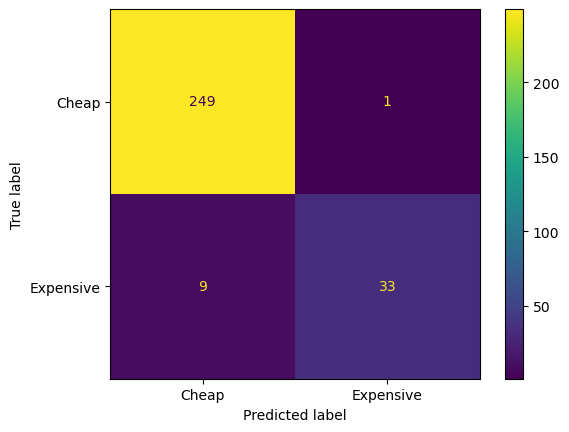

In [378]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_lr,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [386]:
LogisticRegression = lr_df   # pd.DataFrame(search_lr.predict(xx_test))
LogisticRegression.to_csv('LogisticRegression.csv', index=False)

In [381]:
lr_df = pd.DataFrame(search_lr.predict(xx_test))
lr_df.rename(columns = {0:'Expensive'}, inplace=True)
lr_df

,Expensive
0,0
1,0
2,0
3,0
4,0
...,...
1454,0
1455,0
1456,0
1457,0


In [379]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_lr.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.9171597633136095

In [380]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_lr.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.8684210526315789

sklearn.ensemble.RandomForestClassifier

In [346]:
from sklearn.ensemble import RandomForestClassifier

Preprocessing data 
1 Approach - only with One_hot_encoding for categorical data 

In [686]:
#Original 
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [687]:
from sklearn.model_selection import GridSearchCV


big_pipeline = make_pipeline(preprocessor,
                              RandomForestClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
    "randomforestclassifier__random_state":[0],
    "randomforestclassifier__max_depth":[6,8,1],
    "randomforestclassifier__criterion":['gini', 'entropy'],#, 'log_loss'],
    "randomforestclassifier__max_features":["sqrt"],   #, "log2"]
    #"randomforestclassifier__max_samples":[0.0, 1.0]
    "randomforestclassifier__class_weight":["balanced_subsample"],  #"balanced_subsample", 
    "randomforestclassifier__bootstrap":[True, False],
    #"randomforestclassifier__min_impurity_decrease":[0],
    #"randomforestclassifier__n_estimators":[1000]
    #"randomforestclassifier__oob_score":[True, False]
    
}

search_rfc = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_rfc.fit(X_train, y_train)

scores = {"RandomForestClassifier" : search_rfc.best_score_}
scores

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'RandomForestClassifier': 0.9443490701001431}

In [688]:
#94,4
search_rfc.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__class_weight': 'balanced_subsample',
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__random_state': 0}

In [689]:
accuracy_score(search_rfc.predict(X_test), y_test)
#without any fit to this data

0.9554794520547946

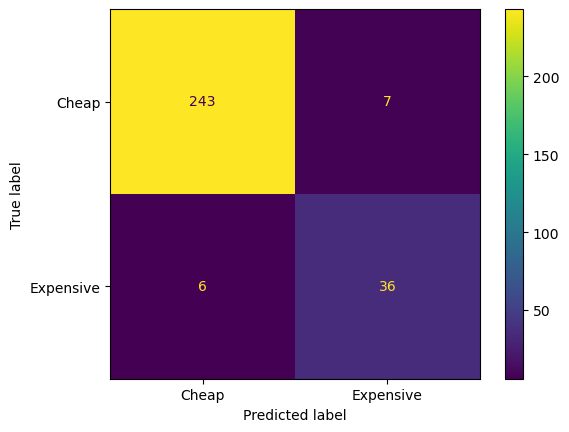

In [690]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_rfc,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [ ]:
rfc_df= pd.DataFrame(search_rfc.predict(xx_test))
rfc_df.rename(columns = {0:'Expensive'}, inplace=True)
rfc_df

In [691]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_rfc.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.9668508287292817

In [692]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_rfc.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.8470588235294119

Preprocessing data 
2 Approach -  with Ordinar_encoding and One_hot_encoding for categorical data 

ORDINAL ENCODING

In [520]:
data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [579]:
data.iloc[:, [79]]

,SaleCondition
0,Normal
1,Normal
2,Normal
3,Abnorml
4,Normal
...,...
1455,Normal
1456,Normal
1457,Normal
1458,Normal


In [556]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning',
       'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtFinT

In [581]:
X_cat_one = X[["Condition1", 'MSZoning', "Heating", "Street", "CentralAir", "Foundation", "BsmtExposure", "BsmtFinType1", "Alley","LotShape", "LandContour","Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition2", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "BsmtFinType2", "Electrical", "Functional", "GarageType", "GarageFinish", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]]    

In [634]:
X_cat_one.iloc[:, [28, 29, 30, 31, 32]]

,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,NaN,NaN,NaN,WD,Normal
1,NaN,NaN,NaN,WD,Normal
2,NaN,NaN,NaN,WD,Normal
3,NaN,NaN,NaN,WD,Abnorml
4,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...
1455,NaN,NaN,NaN,WD,Normal
1456,NaN,MnPrv,NaN,WD,Normal
1457,NaN,GdPrv,Shed,WD,Normal
1458,NaN,NaN,NaN,WD,Normal


In [583]:
X_cat_ord = X[['GarageCond', "GarageQual", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "KitchenQual", "HeatingQC"]]

In [584]:
X_cat_ord

,GarageCond,GarageQual,ExterQual,ExterCond,BsmtQual,BsmtCond,KitchenQual,HeatingQC
0,TA,TA,Gd,TA,Gd,TA,Gd,Ex
1,TA,TA,TA,TA,Gd,TA,TA,Ex
2,TA,TA,Gd,TA,Gd,TA,Gd,Ex
3,TA,TA,TA,TA,TA,Gd,Gd,Gd
4,TA,TA,Gd,TA,Gd,TA,Gd,Ex
...,...,...,...,...,...,...,...,...
1455,TA,TA,TA,TA,Gd,TA,TA,Ex
1456,TA,TA,TA,TA,Gd,TA,TA,TA
1457,TA,TA,Ex,Gd,TA,Gd,Gd,Ex
1458,TA,TA,TA,TA,TA,TA,Gd,Gd


In [665]:
X_cat_ord.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [677]:
for col in X_cat_ord:
    print(X_cat_ord[col].unique())    #loop for all columns

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['Gd' 'TA' 'Ex' 'Fa']
['Ex' 'Gd' 'TA' 'Fa' 'Po']


In [672]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(['GarageCond', "GarageQual", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "KitchenQual", "HeatingQC"])
onehot_cols = X_cat.columns.get_indexer(["Condition1", 'MSZoning', "Heating", "Street", "CentralAir", "Foundation", "BsmtExposure", "BsmtFinType1", "Alley","LotShape", "LandContour","Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition2", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "BsmtFinType2", "Electrical", "Functional", "GarageType", "GarageFinish", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"])




cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)

#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
        
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                                )

full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)


In [664]:
ordinal_cols

array([36, 35,  6,  7,  8,  9, 12, 30])

In [673]:
#Try the new approach with DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV


# full pipeline: preprocessor + model
full_pipeline = make_pipeline(full_preprocessing,
                              DecisionTreeClassifier())

# define parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.9323575804262498}

In [674]:
from sklearn.model_selection import GridSearchCV


big_pipeline = make_pipeline(full_preprocessing, #preprocessor,
                              RandomForestClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    #"columntransformer__cat_pipe_n_features":[5],
    "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
    "randomforestclassifier__random_state":[0],
    "randomforestclassifier__max_depth":[6,8,1],
    "randomforestclassifier__criterion":['gini', 'entropy'],#, 'log_loss'],
    "randomforestclassifier__max_features":["sqrt"],   #, "log2"]
    "randomforestclassifier__class_weight":["balanced_subsample"],  #"balanced_subsample", 
    
    
    
    #"randomforestclassifier__max_samples":[0.0, 1.0]
    #"randomforestclassifier__bootstrap":[True, False],
    #"randomforestclassifier__min_impurity_decrease":[0],
    #"randomforestclassifier__n_estimators":[1000]
    #"randomforestclassifier__oob_score":[True, False]
    
}

search_rfc = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_rfc.fit(X_train, y_train)

scores = {"RandomForestClassifier" : search_rfc.best_score_}
scores

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'RandomForestClassifier': 0.9426213271706836}

In [678]:
#94,4
search_rfc.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'median',
 'randomforestclassifier__class_weight': 'balanced_subsample',
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__random_state': 0}

accuracy test

In [679]:
accuracy_score(search_rfc.predict(X_test), y_test)
#without any fit to this data

0.9623287671232876

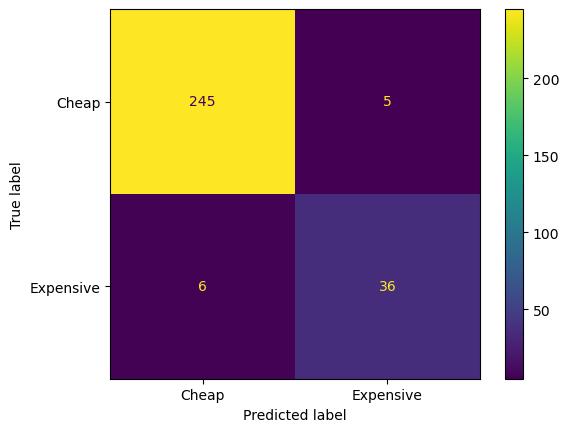

In [680]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_rfc,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [682]:
rfc_df_2 = pd.DataFrame(search_rfc.predict(xx_test))
rfc_df_2.rename(columns = {0:'Expensive'}, inplace=True)
rfc_df_2


,Expensive
0,0
1,0
2,0
3,0
4,0
...,...
1454,0
1455,0
1456,0
1457,0


In [683]:
RandomForestClassifier_2 = rfc_df_2   #pd.DataFrame(search_rfc.predict(xx_test))
RandomForestClassifier_2.to_csv('RandomForestClassifier_2.csv', index=False)

In [495]:
RandomForestClassifier_1 = rfc_df   #pd.DataFrame(search_rfc.predict(xx_test))
RandomForestClassifier_1.to_csv('RandomForestClassifier.csv', index=False)

In [684]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_rfc.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.9536784741144414

In [685]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_rfc.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.8674698795180722

In [ ]:
TEST DATA 

In [389]:
url = "https://drive.google.com/file/d/1JX55ps4k-Qitl7f9ODRIgOa--MRcMsj6/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
xx_test = pd.read_csv(path)

In [696]:
xx_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,11622,80.0,882.0,2,0,0,1.0,140,120,RH,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,14267,81.0,1329.0,3,0,0,1.0,393,0,RL,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,13830,74.0,928.0,3,1,0,2.0,212,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,9978,78.0,926.0,3,1,0,2.0,360,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,5005,43.0,1280.0,2,0,0,2.0,0,144,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,21.0,546.0,3,0,0,0.0,0,0,RM,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,1894,21.0,546.0,3,0,0,1.0,0,0,RM,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,20000,160.0,1224.0,4,1,0,2.0,474,0,RL,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,10441,62.0,912.0,3,0,0,0.0,80,0,RL,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [105]:
search.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [388]:
url = "https://drive.google.com/file/d/11GFjtfeUeSSmFByQ3fO0ZcC6LFwbn2ka/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
ids = pd.read_csv(path)
ids

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [ ]:
CONCAT data -
https://www.datacamp.com/tutorial/joining-dataframes-pandas?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720818&utm_adgroupid=143216588777&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=671350460558&utm_targetid=dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=9043202&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tutorials_2-b2c_3-eu_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-sep23&gclid=CjwKCAjw6eWnBhAKEiwADpnw9mcsOkDqFTtDmUgOGfaIkjf64RpQBrrEzwG-JCsSpTRMY9_e0wwrFxoCp8UQAvD_BwE

In [496]:
RandomForestClassifier_1

,Expensive
0,0
1,0
2,0
3,0
4,0
...,...
1454,0
1455,0
1456,0
1457,0


In [497]:
rfc = pd.concat([ids, RandomForestClassifier_1], axis=1)#, ignore_index=True)
rfc.to_csv('rfc.csv', index=False)

In [394]:
dtc = pd.concat([ids,DecisionTreeClassifier], axis=1)
dtc.to_csv('dtc.csv', index=False)

In [393]:
#KNN = (KNeighborsClassifier[0], ids[0])
KNN = pd.concat([ids, KNeighborsClassifier], axis=1)
KNN.to_csv('KNN.csv', index=False)

In [392]:
lr = pd.concat([ids, LogisticRegression], axis=1)
lr.to_csv('lr.csv', index=False)

Support Vector Machines  +++  MODEL

In [395]:
from sklearn.svm import SVC

In [417]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()



numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [440]:
from sklearn.model_selection import GridSearchCV


big_pipeline = make_pipeline(preprocessor,
                              SVC())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "columntransformer__num_pipe__minmaxscaler__clip":[True, False],
    "svc__kernel":["linear"],#, "poly", "rbf", "sigmoid"],  #, "precomputed" 'missconfugurate'
    "svc__degree":[1, 3, 1],  #bydefault=3
    "svc__gamma":["scale", "auto"]
    
    
    #"columntransformer__num_pipe__standardscaler__with_mean":[True, False],
    #"columntransformer__num_pipe__standardscaler__with_std":[True, False],
    #"svc__decision_function_shape": ['ovr'],
    #"svc__probability":[False, True],
    #"svc__verbose":[True, False],
    #"svc__shrinking":[True, False],
    #"svc__random_state":[0]
   #"svc__random_state":[0]
    
   # 'C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 
   # 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 
   # 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
       
#LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
 #         intercept_scaling=1, loss='squared_hinge', max_iter=1000,
  #        multi_class='ovr', , random_state=None, tol=0.0001,
   #       verbose=0)
    
}

search_scv = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_scv.fit(X_train, y_train)

scores = {"RandomForestClassifier" : search_scv.best_score_}
scores

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'RandomForestClassifier': 0.9340816551116979}

In [429]:
search_scv.best_params_

{'columntransformer__num_pipe__minmaxscaler__clip': True,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'svc__degree': 1,
 'svc__gamma': 'scale',
 'svc__kernel': 'linear',
 'svc__shrinking': True}

In [441]:
accuracy_score(search_scv.predict(X_test), y_test)
#without any fit to this data

0.9315068493150684

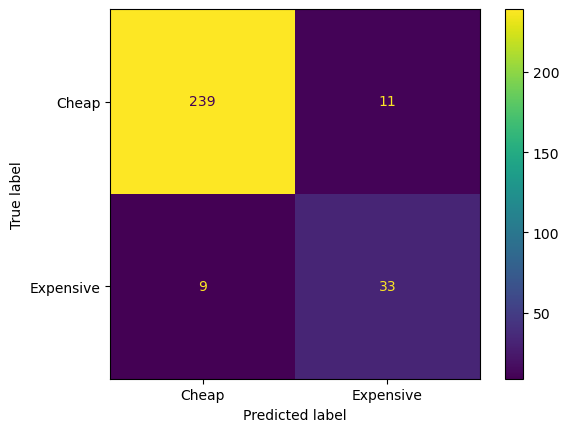

In [442]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_scv,
                                      X_test,
                                      y_test,
                                      display_labels=['Cheap', 'Expensive']);

In [443]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_scv.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

0.9452449567723343

In [444]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_test
y_pred = search_scv.predict(X_test)
f1_score(y_true, y_pred)# ,average=None)

0.7674418604651163